uncomment de volgende lijn om streamlit te installeren

In [12]:
!pip install streamlit kaggle

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as pe

In [7]:
import kaggle
import zipfile
import os

api = kaggle.api
datasets = api.datasets_list(search='Airplane Crashes and Fatalities')
ref = datasets[0]['ref']

kaggle.api.dataset_download_files(ref,path='data')

files = os.listdir("data")
for file in files:
    if ".zip" in file:
        with zipfile.ZipFile(f"data/{file}","r") as zip_ref:
            zip_ref.extractall("data")


api = kaggle.api
datasets = api.datasets_list(search='Air Traffic Passenger Statistics')
ref = datasets[0]['ref']

kaggle.api.dataset_download_files(ref,path='data')

files = os.listdir("data")
for file in files:
    if ".zip" in file:
        with zipfile.ZipFile(f"data/{file}","r") as zip_ref:
            zip_ref.extractall("data")
            


In [9]:
Air_Traffic = pd.read_csv("data/Air_Traffic_Passenger_Statistics.csv")

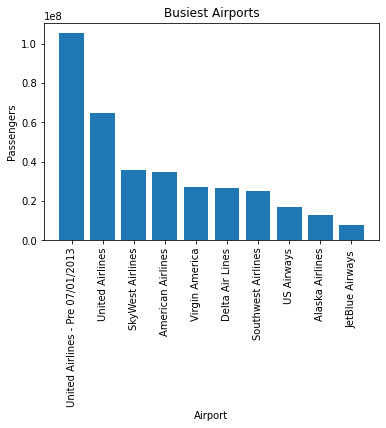

In [10]:
busiest_airports = Air_Traffic.groupby('Operating Airline').sum()['Passenger Count'].sort_values(ascending=False)[:10]

plt.bar(busiest_airports.index, busiest_airports.values)
plt.xticks(rotation=90)
plt.xlabel('Airport')
plt.ylabel('Passengers')
plt.title('Busiest Airports')
plt.show()

In [ ]:
import plotly.express as px
df = px.data.Air_Traffic_Passenger_Statistics()
fig = px.box(df, y="Passenger Count")
fig.show()

In [14]:
!streamlit run case_2.py

^C


In [10]:
acf_df = pd.read_csv("Airplane_Crashes_and_Fatalities_Since_1908.csv")
acf_df.head()

,index,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


In [32]:


def extract_decade(date):
    return round(int(date.split('/')[2])/10)*10

hist_df = acf_df
hist_df['year'] = hist_df['Date'].apply(extract_decade)

pe.histogram(acf_df,x='year')

In [55]:
import json

acf_df.head()

words = {}

ignore_words = """
the
a
and
to
of
in
crashed
into
was
aircraft
plane
after
while
not
for 
off
en
on
at
by 
from
"""

for summary in acf_df['Summary'].dropna():
    try:
        sum_words = summary.split()
    
        for word in sum_words:
            word = word.lower()
            if word in ignore_words:
                continue
            if word in words:
                words[word] += 1
            else:
                words[word] = 0
    except:
        print(summary)

sorted_words = sorted(words,key=words.get,reverse=True)
sorted_counts = sorted(words.values(),reverse=True)



words = pd.DataFrame({'words':sorted_words,'counts':sorted_counts})
words.head(40)

,words,counts
0,pilot,935
1,flight,864
2,with,817
3,engine,784
4,during,782
5,failure,750
6,crew,693
7,approach,613
8,which,571
9,landing,567
